In [1]:
#import pandas
import pandas as pd

In [2]:
#this makes graphs display automatically
%matplotlib inline

In [3]:
#create a new dataframe using the stateElections dataset
#dataFrameName = pd.read_csv("FileName.csv, low_memory = False") -- this is the syntax for importing a dataset into your code
df = pd.read_csv("stateElections.csv", low_memory = False)

In [4]:
#display the first 10 lines of the dataframe
df.head(10)

,State,District,Year,Party,Incumbent,Dem Votes,GOP Votes,Other Votes
0,AK,1,1992,D,0,3019,3002,0
1,AK,2,1992,D,1,4704,2169,0
2,AK,3,1992,D,1,5210,2233,0
3,AK,4,1992,R,1,1754,4538,294
4,AK,5,1992,D,1,3953,0,1153
5,AK,6,1992,D,1,3802,0,0
6,AK,7,1992,R,1,2433,3078,482
7,AK,8,1992,R,0,2438,2634,524
8,AK,9,1992,D,1,2561,2343,672
9,AK,10,1992,R,0,2092,3607,899


In [5]:
#check for null values (this is helpful for cleaning the data)
#df.info() gives you the number of non-null values and type of data in every column
#if a column has less non-null entries than the total number of entries, then it has some null values
#however, this dataset has already been cleaned and doesn't have any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72759 entries, 0 to 72758
Data columns (total 8 columns):
State          72759 non-null object
District       72759 non-null object
Year           72759 non-null int64
Party          72759 non-null object
Incumbent      72759 non-null int64
Dem Votes      72759 non-null int64
GOP Votes      72759 non-null int64
Other Votes    72759 non-null int64
dtypes: int64(5), object(3)
memory usage: 4.4+ MB


In [6]:
#learn more about the columns with type int64 (or other number types) 
#df.describe() will give you various measurements such as mean, min, and max
df.describe()

,Year,Incumbent,Dem Votes,GOP Votes,Other Votes
count,72759.000000,72759.000000,72759.000000,72759.000000,72759.000000
mean,1993.620088,0.751536,8916.534765,8210.841985,447.971811
std,11.664230,0.432125,12974.355574,13037.066205,1904.369063
min,1971.000000,0.000000,0.000000,0.000000,0.000000
25%,1984.000000,1.000000,2217.000000,365.500000,0.000000
50%,1994.000000,1.000000,5721.000000,4556.000000,0.000000
75%,2004.000000,1.000000,11242.000000,10539.500000,0.000000
max,2012.000000,1.000000,447725.000000,440274.000000,123096.000000


In [7]:
#you can also use this for specific columns with type object - but it will output slightly different information
#df['ColumnName'].describe will tell you how many total entries there are, how many unique entries there are, what the most frequent value is, and how many times it appears
df['State'].describe()

count     72759
unique       38
top          PA
freq       4263
Name: State, dtype: object

In [8]:
df['District'].describe()

count     72759
unique      872
top          12
freq        643
Name: District, dtype: object

In [9]:
df['Party'].describe()

count     72759
unique        5
top           D
freq      41430
Name: Party, dtype: object

In [10]:
#continue to explore the data! you can ask lots of different questions
#ex: how frequently does each party appear?
#df['ColumnName'].value_counts() sorts the unique values in a column based on their frequency
df['Party'].value_counts()

D        41430
R        31021
Other      151
I          107
Both        50
Name: Party, dtype: int64

In [11]:
#ex: what were the total Dem Votes and GOP Votes per state in the whole dataframe?

In [12]:
#create a new dataframe from the original that only includes the State, Dem Votes, and GOP Votes columns
#newDataFrame = oldDataFrame[['ColumnName1', 'ColumnName2',...]] -- syntax to create a new dataframe that includes columns from an old dataframe
#creating a new dataframe can be helpful because it'll be smaller and have less extra data, and you won't do anything to your original dataframe
df1 = df[['State', 'Dem Votes', 'GOP Votes']]

In [13]:
#display the first 10 rows of the new dataframe
df1.head(10)

,State,Dem Votes,GOP Votes
0,AK,3019,3002
1,AK,4704,2169
2,AK,5210,2233
3,AK,1754,4538
4,AK,3953,0
5,AK,3802,0
6,AK,2433,3078
7,AK,2438,2634
8,AK,2561,2343
9,AK,2092,3607


In [14]:
#this is kind of confusing, but create a new dataframe from this one that groups the data by state, and finds the sum of the Dem Votes per state
#groupby() arranges the other columns in a dataframe based on one specific column
#finding the sum of the Dem Votes and the GOP Votes when the dataframe is grouped by the state will give you the total Dem Votes and GOP Votes per state
dfD = df1.groupby(['State'])[['Dem Votes']].sum()

In [15]:
#display the first 10 rows of the new dataframe
dfD.head(10)

,Dem Votes
State,
AK,1030180
AL,5959584
AR,2859963
CA,99009022
CO,12794738
CT,13137514
DE,2525877
FL,22792957
GA,11003327


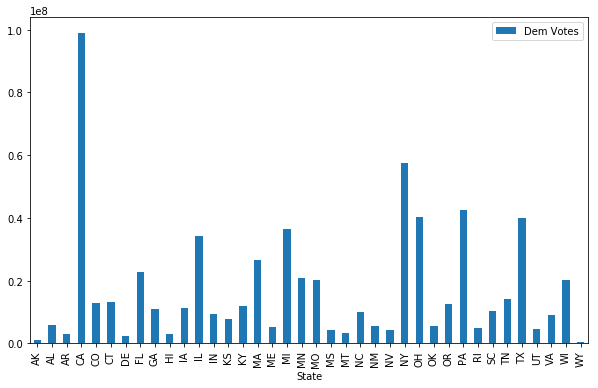

In [16]:
#now you can make a graph of the Dem Votes per state!
#dataFrameName.plot.bar() creates a bar graph
#you can adjust the size with figsize = (x, y)
dfD.plot.bar(figsize = (10, 6))

In [17]:
#do the same for the GOP Votes
dfG = df1.groupby(['State'])[['GOP Votes']].sum()

In [18]:
#display the first 10 rows of the new dataframe
dfG.head(10)

,GOP Votes
State,
AK,1380065
AL,3620563
AR,2320523
CA,82849840
CO,14717388
CT,11846371
DE,2543759
FL,27630700
GA,14020359


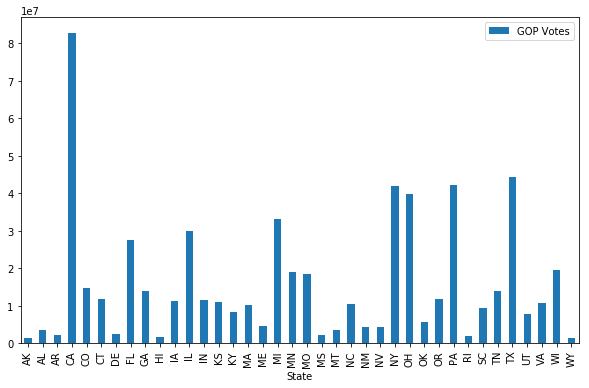

In [19]:
#make another graph!
dfG.plot.bar(figsize = (10, 6))

In [20]:
#now let's see if we can combine these two!
#try creating a new dataframe that finds the sum of both the Dem Votes and the GOP Votes per state
dfTotal = df1.groupby(['State'])[['Dem Votes', 'GOP Votes']].sum()

In [21]:
#display the first 10 rows of the new dataframe
dfTotal.head(10)

,Dem Votes,GOP Votes
State,,
AK,1030180,1380065
AL,5959584,3620563
AR,2859963,2320523
CA,99009022,82849840
CO,12794738,14717388
CT,13137514,11846371
DE,2525877,2543759
FL,22792957,27630700
GA,11003327,14020359


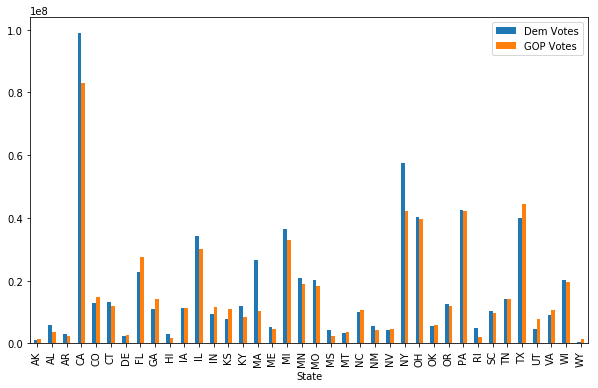

In [22]:
#now let's try making a graph with two x-axis values!
dfTotal.plot.bar(figsize = (10, 6))

In [23]:
#this graph shows the total Dem Votes and GOP Votes per state for the entire dataframe
#however, the dataframe doesn't have election data for every state each year
#what if we just wanted to know the total Dem Votes and GOP Votes per state in 2012?

In [24]:
#create a new dataframe from the original dataframe that only includes entries where the year is 2012
#newDataFrame = oldDataFrame[oldDataFrame.ColumnName == desiredValue] 
#the syntax for selecting specific entries based on the value of one column is different than creating a dataframe by taking whole columns from the original
df2012 = df[df.Year == 2012]

In [25]:
#display the first 10 rows of the new dataframe
df2012.head(10)

,State,District,Year,Party,Incumbent,Dem Votes,GOP Votes,Other Votes
400,AK,1,2012,R,0,1525,5428,57
401,AK,2,2012,R,1,4012,4420,33
402,AK,3,2012,R,1,0,4306,166
403,AK,4,2012,D,1,3160,2992,24
404,AK,5,2012,R,0,3410,3950,32
405,AK,6,2012,R,1,1878,4879,41
406,AK,7,2012,R,1,0,5517,265
407,AK,8,2012,R,0,0,6183,282
408,AK,9,2012,R,0,1767,4759,26
409,AK,10,2012,R,1,1179,4755,13


In [26]:
#now we can do the same thing as before
#create a new dataframe from this dataframe that just includes the state, Dem Votes, and GOP Votes
dfTotal2 = df2012[['State', 'Dem Votes', 'GOP Votes']]

In [27]:
#display the first 10 rows of the new dataframe
dfTotal2.head(10)

,State,Dem Votes,GOP Votes
400,AK,1525,5428
401,AK,4012,4420
402,AK,0,4306
403,AK,3160,2992
404,AK,3410,3950
405,AK,1878,4879
406,AK,0,5517
407,AK,0,6183
408,AK,1767,4759
409,AK,1179,4755


In [28]:
#group the dataframe by state and find the sum of the Dem Votes and GOP Votes
#instead of creating a new dataframe, you can also just update the dataframe to what you want it to be
dfTotal2 = dfTotal2.groupby(['State'])[['Dem Votes', 'GOP Votes']].sum()

In [29]:
#display the first 10 rows of the updated dataframe
dfTotal2.head(10)

,Dem Votes,GOP Votes
State,,
AK,92803,160359
AR,506021,561432
CA,10870957,7087238
CO,1786667,1718001
CT,1498941,1156334
DE,446063,258216
FL,4616749,5664616
GA,2393338,3986894
HI,353635,158797


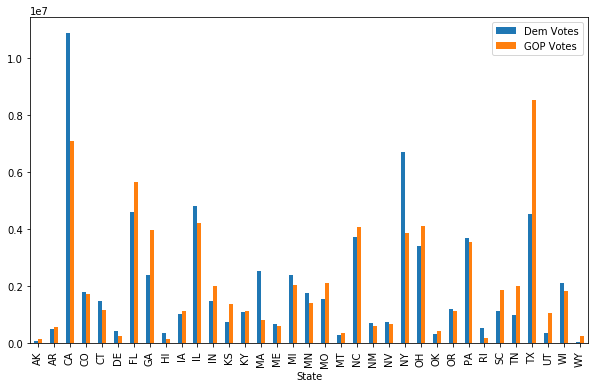

In [30]:
#now we can make another graph! 
dfTotal2.plot.bar(figsize = (10, 6))

In [31]:
#now it's your turn! feel free to ask more questions and create more graphs!
#however, you don't always need to use a graph to answer a question
#also, there are lots of different types of graphs. check out the resources page to learn how to make them!

In [32]:
#have fun!!!